<a href="https://colab.research.google.com/github/yajima-yasutoshi/DataMinig/blob/main/%E5%9F%BA%E7%A4%8E%E9%9B%86%E8%A8%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#データ分析の流れ
データ分析は基本的には以下のステップで行う。
1. 前処理
2. 基礎集計
3. モデル構築
4. 結果のまとめ



In [ ]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 27.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=2a48727c7ad92b57a32b8722c7e00494b714a599eb30b7a03f7f3b35d415b853
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


#準備
データ分析に必要なPythonライブラリーを読み込みます。


*   numpy：数値計算を行うためのライブラリー
*   pandas：主にデータ加工を行うためのライブラリー



In [ ]:

import numpy as np
import pandas as pd
# from sklearn.preprocessing import LabelEncoder


# データをファイルから読み込む

エクセルファイルをPython環境に読み込むためにPandasの
read_excel()というメソッドを使う


In [ ]:
# 読み込むファイルを指定する
file_path = '/content/drive/MyDrive/周南公立大学/講義/データマイニング/データ/customer_data2.xlsx'

# data という変数に読み込む
data = pd.read_excel(file_path)

In [ ]:
print( data.shape )

(500, 9)


# 中身を表示
変数に読み込んデータの内容を表示させる


In [ ]:
# データの最初の10行を表示する
data.head(10)

,顧客ID,性別,年齢,職業,年収,スマホの所有,スマホ利用時間,Aの利用回数,Bの利用回数
0,81336944,男性,39.0,会社員,393,はい,1.67,1,12
1,41990933,女性,51.0,公務員,450,はい,2.44,0,11
2,84494791,男性,45.0,会社員,497,はい,0.69,1,21
3,29406622,女性,27.0,公務員,313,はい,1.40,5,8
4,20205360,女性,61.0,会社員,292,はい,1.77,2,24
5,55928989,男性,39.0,公務員,317,はい,1.60,1,11
6,46119309,女性,12.0,学生,0,いいえ,0.00,4,8
7,81075284,男性,12.0,学生,0,いいえ,0.00,11,13
8,39537381,男性,16.0,その他,214,はい,1.14,13,19
9,41429479,男性,59.0,公務員,935,いいえ,0.00,3,13


In [ ]:
# Display the last 5 rows
data.tail()

,顧客ID,性別,年齢,職業,年収,スマホの所有,スマホ利用時間,Aの利用回数,Bの利用回数
495,45099496,男性,45.0,公務員,411,はい,2.94,6,19
496,30507179,男性,18.0,学生,215,はい,2.01,12,8
497,10588383,男性,54.0,その他,419,はい,1.04,2,18
498,59997136,男性,65.0,公務員,556,いいえ,0.00,2,12
499,99854703,NaN,26.0,会社員,290,はい,1.28,9,18


#データの概要を確認する


*   レコード数
*   カラム（項目）数
*   各カラムの属性



In [ ]:
#データの全体概要を表示
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   顧客ID     500 non-null    int64  
 1   性別       497 non-null    object 
 2   年齢       497 non-null    float64
 3   職業       500 non-null    object 
 4   年収       500 non-null    int64  
 5   スマホの所有   500 non-null    object 
 6   スマホ利用時間  500 non-null    float64
 7   Aの利用回数   500 non-null    int64  
 8   Bの利用回数   500 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 35.3+ KB


In [ ]:
data.describe()

,顧客ID,年齢,年収,スマホ利用時間,Aの利用回数,Bの利用回数
count,5.000000e+02,497.000000,500.00000,500.000000,500.000000,500.000000
mean,5.426307e+07,38.959759,428.78400,1.564200,4.840000,14.880000
std,2.549208e+07,17.766587,251.60292,0.961873,3.821991,4.602169
min,1.018052e+07,10.000000,0.00000,0.000000,0.000000,4.000000
25%,3.262621e+07,23.000000,244.00000,1.070000,2.000000,12.000000
50%,5.239307e+07,39.000000,418.50000,1.530000,4.000000,15.000000
75%,7.775383e+07,53.000000,605.25000,2.070000,7.000000,18.000000
max,9.985470e+07,130.000000,1304.00000,6.870000,20.000000,31.000000


# データクレンジング

## 欠損値の処理

In [ ]:
#欠損値の個数を調べる
# data という変数に読み込む
# data = pd.read_excel(file_path)
data.isnull().sum()

顧客ID       0
性別         3
年齢         3
職業         0
年収         0
スマホの所有     0
スマホ利用時間    0
Aの利用回数     0
Bの利用回数     0
dtype: int64

In [ ]:
data_dropped = data.dropna()

#data.dropna(inplace=True)
#data_dropped = data.dropna(subset=['職業'])

print(data_dropped.isnull().sum())
data_dropped.info()

data.info()


顧客ID       0
性別         0
年齢         0
職業         0
年収         0
スマホの所有     0
スマホ利用時間    0
Aの利用回数     0
Bの利用回数     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 0 to 498
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   顧客ID     494 non-null    int64  
 1   性別       494 non-null    object 
 2   年齢       494 non-null    float64
 3   職業       494 non-null    object 
 4   年収       494 non-null    int64  
 5   スマホの所有   494 non-null    object 
 6   スマホ利用時間  494 non-null    float64
 7   Aの利用回数   494 non-null    int64  
 8   Bの利用回数   494 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 38.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   顧客ID     500 non-null    int64  
 1   性別       497 non-null    object 
 2   年齢       497 non-null   

In [ ]:
# Or drop them entirely (use sparingly)
# data という変数に読み込む
data = pd.read_excel(file_path)
print( data.isnull().sum() )

data.dropna(inplace=True)
print( data.isnull().sum() )
print( data.isnull().sum() )

顧客ID       0
性別         3
年齢         3
職業         0
年収         0
スマホの所有     0
スマホ利用時間    0
Aの利用回数     0
Bの利用回数     0
dtype: int64
顧客ID       0
性別         0
年齢         0
職業         0
年収         0
スマホの所有     0
スマホ利用時間    0
Aの利用回数     0
Bの利用回数     0
dtype: int64
顧客ID       0
性別         0
年齢         0
職業         0
年収         0
スマホの所有     0
スマホ利用時間    0
Aの利用回数     0
Bの利用回数     0
dtype: int64


## 異常値の削除

In [ ]:
# 年齢が80歳以上のレコードのインデックスを取得
indices_to_drop = data[data['年齢'] >= 80].index

# 指定したインデックスのレコードを削除
# data.drop(indices_to_drop, inplace=True)
data_dropped = data.drop(indices_to_drop)

#カウント

In [ ]:
# print( data['職業'].unique() )
print( data['職業'].value_counts())
print( data['性別'].value_counts())

#print( data['スマホの所有'].value_counts())

その他    152
会社員    140
公務員    133
学生      69
Name: 職業, dtype: int64
男性    347
女性    147
Name: 性別, dtype: int64


# 集計

In [ ]:
selected_data = data[['性別', '年齢', '年収', 'Aの利用回数', 'Bの利用回数']]

# 性別ごとに平均を計算
# average_by_gender =
selected_data.groupby('性別').mean()


,年齢,年収,Aの利用回数,Bの利用回数
性別,,,,
女性,39.306122,364.258503,3.020408,14.673469
男性,38.870317,456.386167,5.616715,14.976945


In [ ]:
selected_data = data[['性別', '職業', '年齢', '年収', 'Aの利用回数', 'Bの利用回数']]
selected_data.groupby('性別').median()

<ipython-input-20-4ce6976b9415>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  selected_data.groupby('性別').median()


,年齢,年収,Aの利用回数,Bの利用回数
性別,,,,
女,37.0,321.0,3.0,13.0
男,39.0,393.0,5.0,14.0


In [ ]:
selected_data = data[['性別', '職業','年齢']]
selected_data.groupby(['性別','職業']).min()

年齢
性別 職業       
女  その他  14.0
   会社員  20.0
   公務員  21.0
   学生   11.0
男  その他  14.0
   会社員  19.0
   公務員  19.0
   学生   10.0

In [ ]:
data.groupby(['性別','職業']).mean()

顧客ID         年齢          年収    スマホの所有     Aの利用回数     Bの利用回数
性別 職業                                                                       
女  その他  520617.229167  37.229167  315.020833  0.562500   3.104167  14.395833
   会社員  485276.346939  41.959184  373.040816  0.469388   2.897959  15.428571
   公務員  648191.812500  42.687500  382.354167  0.520833   3.083333  15.145833
   学生   555806.727273  15.545455   63.681818  0.727273   2.818182   8.818182
男  その他  567081.701923  38.923077  412.663462  0.673077   5.528846  14.596154
   会社員  570469.193548  42.076087  459.881720  0.795699   5.129032  14.301075
   公務員  522640.303371  43.651685  486.191011  0.772727   4.539326  13.775281
   学生   602585.822222  14.311111   56.181818  0.577778  10.133333  15.600000

# ヒストグラムの表示

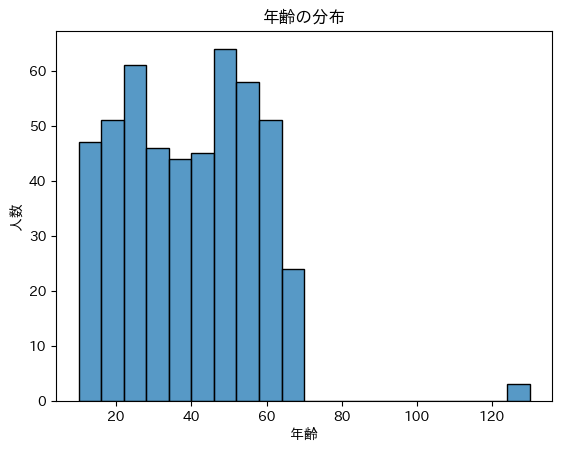

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

# 年齢のデータを取得
ages = data['年齢']

# ヒストグラムを描画
sns.histplot(ages, bins=20, kde=False)
plt.title('年齢の分布')
plt.xlabel('年齢')
plt.ylabel('人数')
plt.show()

In [ ]:
# 年齢が80歳以上のレコードのインデックスを取得
indices_to_drop = data[data['年齢'] >= 80].index

# 指定したインデックスのレコードを削除
# data.drop(indices_to_drop, inplace=True)
data_dropped = data.drop(indices_to_drop)


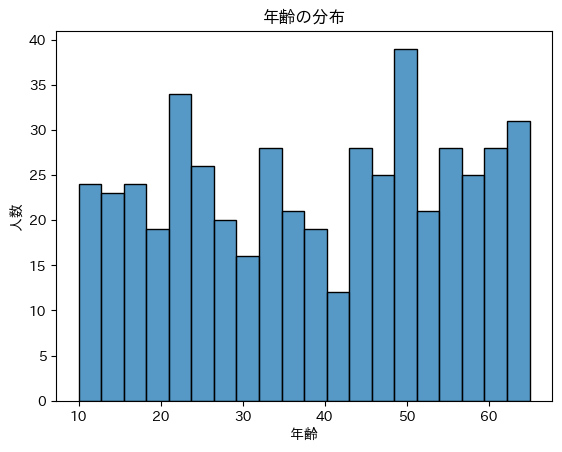

In [ ]:
# 年齢のデータを取得
ages = data_dropped['年齢']

# ヒストグラムを描画
sns.histplot(ages, bins=20, kde=False)
plt.title('年齢の分布')
plt.xlabel('年齢')
plt.ylabel('人数')
plt.show()

# 散布図の表示

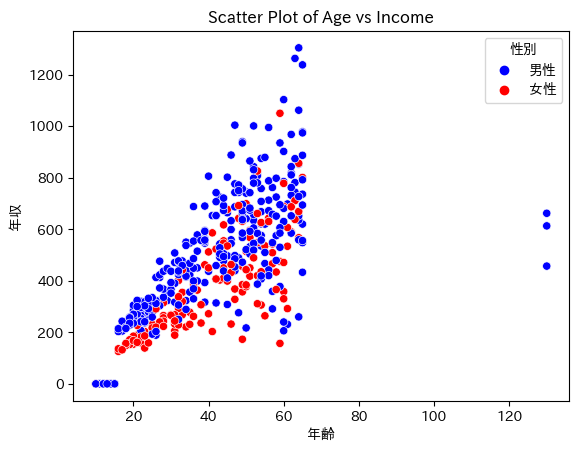

In [ ]:
# Plot scatter plot for Age vs Income using seaborn
sns.scatterplot(data=data, x='年齢', y='年収', hue='性別', palette={'男性': 'blue', '女性': 'red'})
plt.title('Scatter Plot of Age vs Income')
plt.show()

# 散布図行列表示

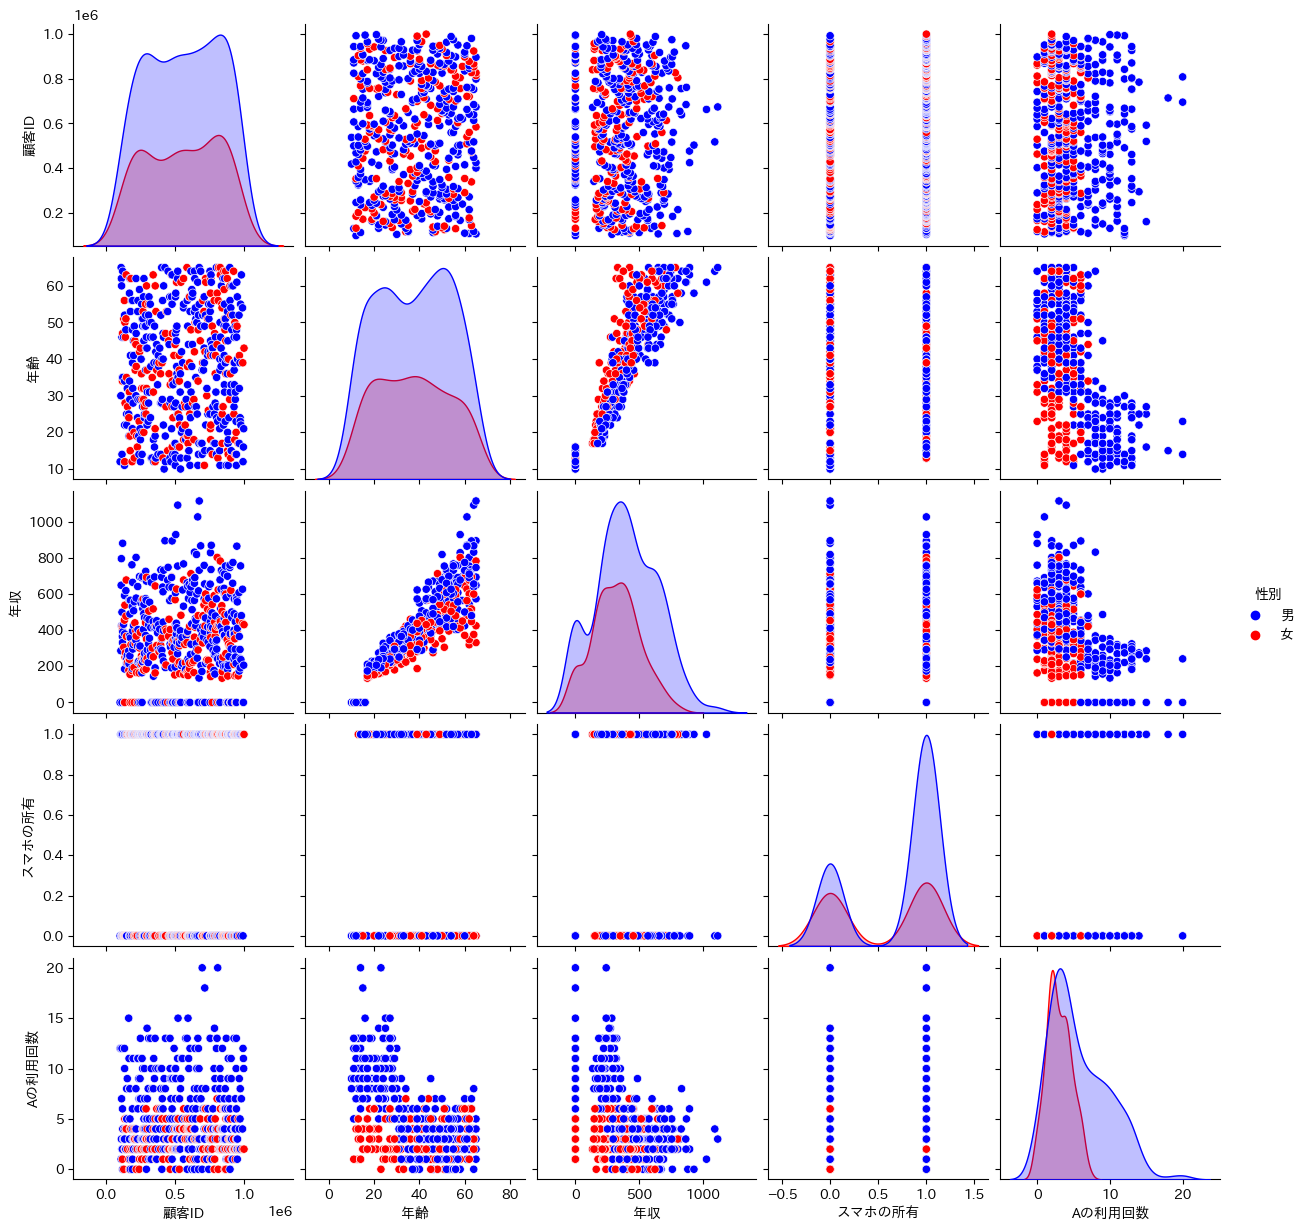

In [ ]:

# Let's bring in the scripting interface
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
# sns.set(font='IPAexGothic')

# sns.pairplot( data )
# sns.pairplot( data.iloc[:,0:7] )
sns.pairplot( data.iloc[:,0:7], hue='性別', palette={'男': 'blue', '女': 'red'})
plt.show()

# その他

In [ ]:
import pandas as pd
# data= pd.read_csv('/content/drive/MyDrive/周南公立大学/Python/ObesityDataSet_raw_and_data_sinthetic.csv')
data.head()

,顧客ID,性別,年齢,年収,職業,スマホの所有,Aの利用回数,Bの利用回数
0,100337,男,12,0,学生,0.0,12,17
1,104229,NaN,53,746,会社員,0.0,3,10
2,105728,男,30,286,会社員,1.0,12,14
3,107895,男,65,648,公務員,NaN,1,18
4,109469,男,62,795,その他,0.0,3,18


In [ ]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

breast_cancer_data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
Y = pd.Series(breast_cancer.target)
breast_cancer_data['target'] = Y